In [57]:
# m_j = m_2
# m_i = m_1  and m_2< equal to m_1.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams



plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.

In [58]:
# Probalility distribution of X of PBH binaries without and with halos for PBHs 
# mass range of m_min M☉ - m_max M☉ .
        
def P_X(m_1, m_2, Δ_1, Δ_2,t_m, X, DM_halos_presence):
    
    if  m_1 < 5:  
        return 0
    
    if m_2 < 5:
        return 0
    
    
    else:
        

        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))


        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                                 # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))

        return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X)



In [59]:
# Probability distribution of final merger time of  PBH binaries without and with halos for 
# PBHs mass range of m_min M☉ - m_max M☉.
        
def P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f, DM_halos_presence):
    
    if  m_1 < 5:  
        return 0
    
    if m_1 < 5:
        return 0
    

    else:


        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))


        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                                 # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))





        if DM_halos_presence == 'False':



            k = 22.3819
            A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

            def B_nohalo(m_1,m_2,Δ_1,Δ_2):
                return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))



            def γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
                return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_nohalo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))




            return (1/(7 * t_m))  * ((γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))



        else:

            # Merger rate of  PBH binaries with halos for PBHs mass range of 5 M☉-100 M☉ .
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))


            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))



            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))


            #Schwarzchild Radius of the PBH.
            def r_s(m): 
                return ((2*G*m)/(c**2)) 


            #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
            def r_ta(m): 
                return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


            # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
            def E_b(m): 
                return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))



            def a_initial(m_1, m_2, Δ_1, Δ_2, X):
                return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

            def beta(m_1,m_2,Δ_1, Δ_2, X):
                return ((G * m_1 * m_2)/((G * M(m_1, m_1, m_2, Δ_1, Δ_2, X) * M(m_2, m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))


            k = 22.3387
            A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

            def B_halo(m_1,m_2,Δ_1,Δ_2):
                return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998 *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) 



            def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
                return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_halo(m_1,m_2,Δ_1,Δ_2)   * (X**(-37/21))  * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14)) *  np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X))




            return  (1/(7 * t_m)) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))




In [60]:
# Product of the probability distribution of the final merger time  and X of PBH binaries 
# without and with halos for PBHs mass range of m_min M☉ - m_max M☉ .
        
def P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f, DM_halos_presence): 
    
    if  m_1 < 5: 
        return 0
    
    if m_1 < 5:
        return 0
    
    else: 
    
        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))


        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                                 # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))





        if DM_halos_presence == 'False':

            # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .


            k = 22.3819
            A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

            def B_nohalo(m_1,m_2,Δ_1,Δ_2):
                return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))



            def γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
                return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_nohalo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))




            return (1/(7 * t_m))  * ((γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) 



        else:


            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))


            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))



            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))


            #Schwarzchild Radius of the PBH.
            def r_s(m): 
                return ((2*G*m)/(c**2)) 


            #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
            def r_ta(m): 
                return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


            # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
            def E_b(m): 
                return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))



            def a_initial(m_1, m_2, Δ_1, Δ_2, X):
                return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

            def beta(m_1,m_2,Δ_1, Δ_2, X):
                return ((G * m_1 * m_2)/((G * M(m_1, m_1, m_2, Δ_1, Δ_2, X) * M(m_2, m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))


            k = 22.3387
            A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

            def B_halo(m_1,m_2,Δ_1,Δ_2):
                return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998 *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) 



            def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
                return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_halo(m_1,m_2,Δ_1,Δ_2)   * (X**(-37/21))  * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14)) *  np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X))




            return  (1/(7 * t_m)) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) 




In [61]:
m_1 = 7   #in units of M☉
m_2 = 9    #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


In [62]:
# Choosing the range of PBH mass function from m_min = 5 M☉ - 100 M☉.

m_1 = m_1_list[-1]           # in units of M☉

Δ_1 = Δ_1_list[-1]      

m_2 = m_1_list[0]             # in units of M☉
 
Δ_2 = Δ_1_list[0]     

m_min = 5     #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-5
X_max = 1e5

X = np.geomspace(X_min, X_max, 1000000) # for the PBH mass range of 5 - 100 solar mass.

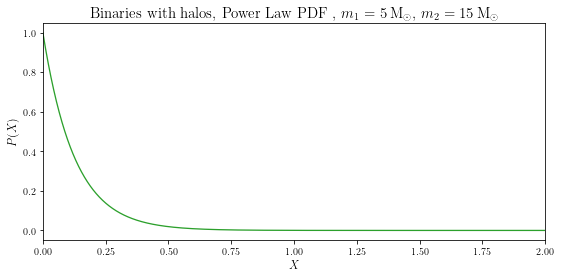

In [63]:
# P(X) in range of PBH mass function from m_min = 5 M☉ - 100 M☉.

plt.figure(figsize = (9,4))


f_pbh = 8.15e-4
f =  0.85*f_pbh
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    
plt.plot(X, P_X(m_1, m_2,  Δ_1, Δ_2,t_m, X, DM_halos_presence = 'True'),'C2')
    
plt.xlim(0, 2)


plt.xlabel('$X$', fontsize = 12)
plt.ylabel('$P(X)$', fontsize = 12)
plt.title('Binaries with halos, Power Law PDF , $m_{1} = 5 \: \mathrm{M_{\odot}}$, $m_{2} = 15 \: \mathrm{M_{\odot}}$', fontsize = 15)
plt.show()

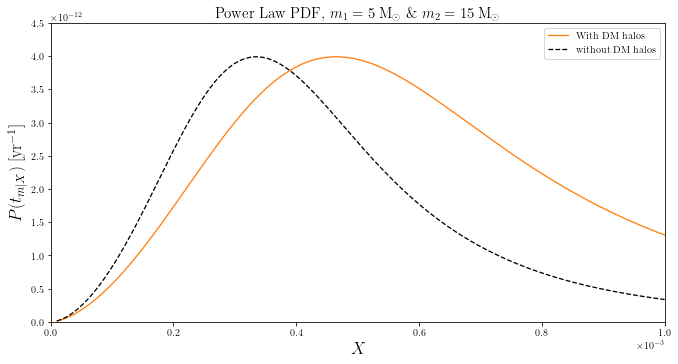

In [64]:
# P(t_m |X) in range of PBH mass function from m_min = 5 M☉ - 100 M☉.

color = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']


plt.figure(figsize = (11,5.5))

   
f_pbh_nohalo_PWR_1 = 8.15e-4
f_pbh_halo_PWR_1 = 5.14e-4

f_nohalo_PWR_1 = 0.85 * f_pbh_nohalo_PWR_1
f_halo_PWR_1  = 0.85 * f_pbh_halo_PWR_1       
    
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

    
plt.plot(X, P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f_halo_PWR_1 , DM_halos_presence = 'True'), 'C1')    
plt.plot(X, P_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_PWR_1,  DM_halos_presence = 'False'), 'k',  linestyle = '--')


plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))

plt.xlim(0, 1e-3)
plt.ylim(0, 4.5e-12)
plt.xlabel('$X$', fontsize = 17)
plt.ylabel('$P(t_{m|X}) \: [\mathrm{yr^{-1}}]$', fontsize = 17)
plt.legend(['With DM halos', 'without DM halos'])
plt.title('Power Law PDF, $m_{1} = 5 \: \mathrm{M_{\odot}}$ \& $m_{2} = 15 \: \mathrm{M_{\odot}}$' , fontsize = 15)
plt.show()

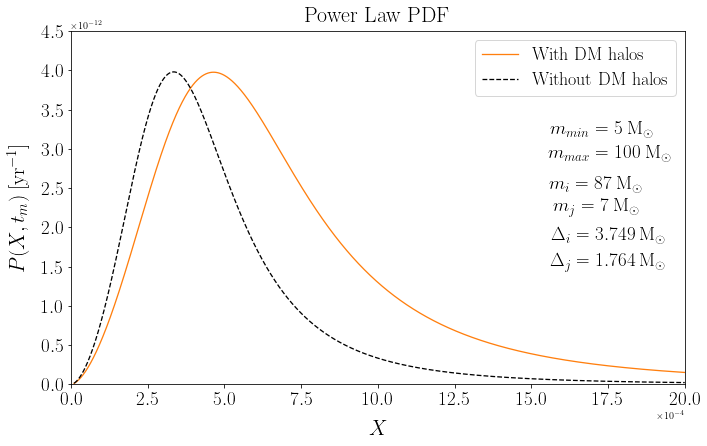

In [65]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 5 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.5))


f_pbh_nohalo_PWR_1 = 8.15e-4
f_pbh_halo_PWR_1 = 5.14e-4

f_nohalo_PWR_1 = 0.85 * f_pbh_nohalo_PWR_1
f_halo_PWR_1 = 0.85 * f_pbh_halo_PWR_1       
       
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

plt.plot(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f_halo_PWR_1 , DM_halos_presence = 'True'), 'C1')
plt.plot(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_PWR_1 , DM_halos_presence = 'False'), 'k--' )


plt.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))



plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlim(0, 2e-3)
plt.ylim(0, 4.5e-12)


plt.text(17.3e-4, 3.25e-12, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(17.56e-4, 2.95e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(17.1e-4, 2.55e-12, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(17.1e-4, 2.25e-12, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(17.5e-4, 1.90e-12, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(17.5e-4, 1.55e-12, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")





plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["With DM halos","Without DM halos"], prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('PWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

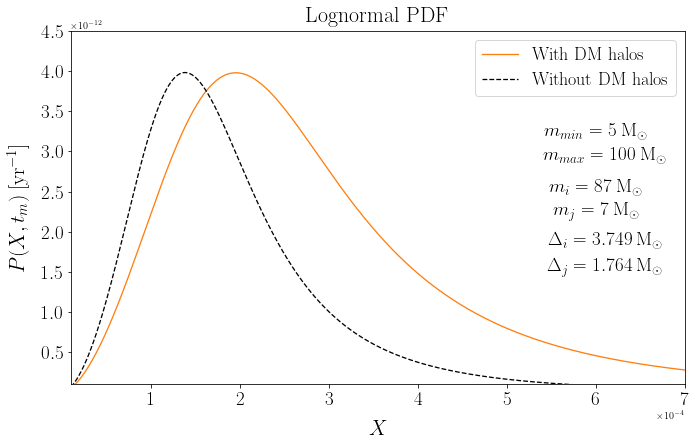

In [66]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 5 M☉ - 100 M☉.

plt.figure(figsize = (11, 6.5))

  
f_pbh_nohalo_Lognormal = 5.63e-4
f_pbh_halo_Lognormal = 3.61e-4

f_nohalo_Lognormal  = 0.85 * f_pbh_nohalo_Lognormal 
f_halo_Lognormal  = 0.85 * f_pbh_halo_Lognormal  


        
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f_halo_Lognormal , DM_halos_presence = 'True'), 'C1')
plt.plot(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_Lognormal,  DM_halos_presence = 'False'), 'k--' )


plt.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))

    
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlim(1e-5, 7e-4)
plt.ylim(1e-13, 4.5e-12)



plt.text(6e-4, 3.25e-12, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(6.1e-4, 2.95e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(6e-4, 2.55e-12, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(6e-4, 2.25e-12, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(6.1e-4, 1.90e-12, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(6.1e-4, 1.55e-12, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")



plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["With DM halos","Without DM halos"], prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('LgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

In [71]:
# Choosing the range of PBH mass function from m_min = 1e-3 M☉ - 100 M☉.
# Keeping all these values same.


m_1 = m_1_list[-1]           # in units of M☉

Δ_1 = Δ_1_list[-1]      

m_2 = m_1_list[0]             # in units of M☉
 
Δ_2 = Δ_1_list[0]     

m_min = 1e-3  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-8
X_max = 1e5
X = np.geomspace(X_min, X_max, 1000000) # for the PBH mass range of 1e-3 - 100 solar mass.

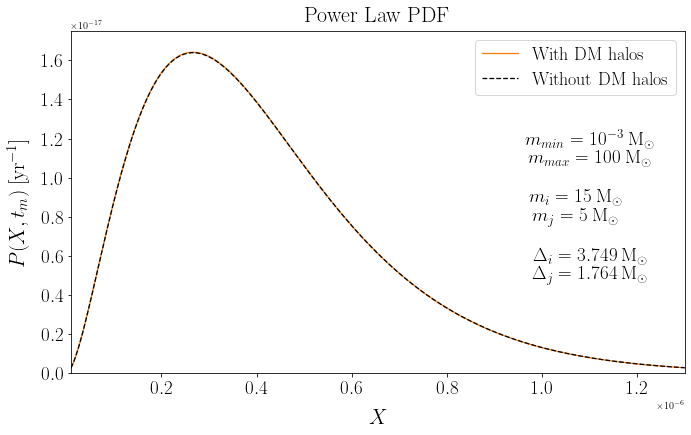

In [82]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.3))


f_pbh_nohalo_PWR_2  = 1.18
f_pbh_halo_PWR_2    = 1.18

f_nohalo_PWR_2 = 0.85 * f_pbh_nohalo_PWR_2
f_halo_PWR_2   = 0.85 * f_pbh_halo_PWR_2       
    
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-3     #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

plt.plot(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_PWR_2,  DM_halos_presence = 'True'), 'C1')
plt.plot(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_PWR_2,  DM_halos_presence = 'False'), 'k--')


#plt.ticklabel_format(axis='x', style='sci', scilimits=(4,4))


plt.text(1.1e-6, 1.2e-17, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(1.1e-6, 1.1e-17, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(1.07e-6, 0.9e-17, "$m_{i} = 15 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(1.07e-6, 0.8e-17, "$m_{j} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(1.1e-6, 0.6e-17, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(1.1e-6, 0.5e-17, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")






plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)



plt.xlim(1e-8, 1.3e-6)
plt.ylim(0, 1.75e-17)



plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["With DM halos","Without DM halos"],prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2PWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

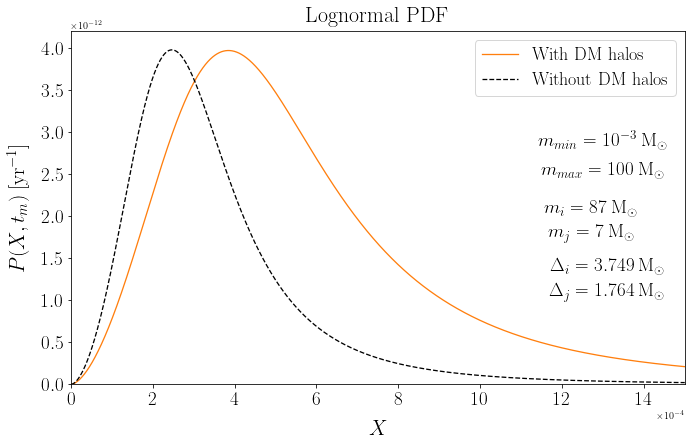

In [83]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 1e-3 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.5))

   
f_pbh_nohalo_Lognormal_2 = 1.01e-3
f_pbh_halo_Lognormal_2 = 7.20e-4

f_nohalo_Lognormal_2  = 0.85 * f_pbh_nohalo_Lognormal_2 
f_halo_Lognormal_2  = 0.85 * f_pbh_halo_Lognormal_2  

        
          
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f_halo_Lognormal_2, DM_halos_presence = 'True'), 'C1')
plt.plot(X, P_X_tm(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_Lognormal_2,  DM_halos_presence = 'False'), 'k--')


plt.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))

plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlim(0, 1.5e-3)
plt.ylim(0, 4.2e-12)



plt.text(13e-4, 2.9e-12, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(13e-4, 2.55e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(12.7e-4, 2.1e-12, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(12.7e-4, 1.8e-12, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(13.1e-4, 1.40e-12, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(13.1e-4, 1.09e-12, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["With DM halos","Without DM halos"],prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Lognormal PDF' , fontsize = 22, pad = 9)
plt.savefig('2LgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

In [60]:
# The conclusion is that for the Lognormal Law PBH mass function range of  m_min = 5 M☉ - m_max = 100 M☉ 
# &  m_min = 1e-3 M☉ - m_max = 100 M☉, P(t_m|X) for binaries with DM halos is shifted 
# towards the higher values of X making the values of dP/dt_m higher 
# (due to integration of P(t_m|X) with the corresponding higher values of X which 
# ultimately makes the values of the merger rate higher (than binaries without DM halos) 
# for the Lognormal Law PBH mass function. 


# However, for Power Law PBH mass function range of m_min = 5 M☉ - m_max = 100 M☉,  
# P(t_m|X) for binaries with DM halos is shifted towards the higher values of X 
# making the values of dP/dt_m higher which ultimately makes the values of the merger 
# rate higher(compared to binaries without halos).
# But for Power Law PBH mass function range of m_min = 1e-3 M☉ - m_max = 100 M☉. 
# the values of P(t_m|X)  are same for binaries with and without DM halos which implies
# that the merger rate for binaries with Power Law PBH mass function in range 
# m_min = 1e-3 M☉ - m_max = 100 M☉  will be the same.


# Or in other words, when you have a Power Law down to 1e-3 Msun,
# masses as large as 5-100 Msun are very rare (so the merger rate is much smaller 
# in that case, than when you have a Lognormal mass function in the range 5- 100 Msun).
